# Glasses or NO Glasses

## Deep learning model using CNN 

Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle
import pandas as pd

In [3]:
import os 
os.mkdir("train")

Open and Read data

In [4]:
with open("../input/datacleaningglassesnoglasses/glasses.txt", "rb") as fp:
    glasses = pickle.load(fp)
with open("../input/datacleaningglassesnoglasses/no_glasses.txt", "rb") as fp: 
    no_glasses = pickle.load(fp)

## Data augmentation and preprocessing 

Add label column "glasses" to know image has glass(1) or NO glasess (0)  

In [5]:
train=pd.read_csv('/kaggle/input/glasses-or-no-glasses/train.csv')
train_df=train[['id','glasses']]
directory = '/kaggle/input/glasses-or-no-glasses/faces-spring-2020/faces-spring-2020/face-'
train_df['path'] = train_df['id'].apply(lambda x: directory+str(x)+'.png').tolist()
train_df=train_df[['id','path','glasses']]
display(train_df)

/tmp/ipykernel_20/3422577204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['path'] = train_df['id'].apply(lambda x: directory+str(x)+'.png').tolist()


,id,path,glasses
0,1,/kaggle/input/glasses-or-no-glasses/faces-spri...,0
1,2,/kaggle/input/glasses-or-no-glasses/faces-spri...,1
2,3,/kaggle/input/glasses-or-no-glasses/faces-spri...,1
3,4,/kaggle/input/glasses-or-no-glasses/faces-spri...,0
4,5,/kaggle/input/glasses-or-no-glasses/faces-spri...,0
...,...,...,...
4495,4496,/kaggle/input/glasses-or-no-glasses/faces-spri...,0
4496,4497,/kaggle/input/glasses-or-no-glasses/faces-spri...,0
4497,4498,/kaggle/input/glasses-or-no-glasses/faces-spri...,1
4498,4499,/kaggle/input/glasses-or-no-glasses/faces-spri...,1


Split

In [6]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2, stratify=train_df['glasses'])

Creating ImageDataGenerator



In [7]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df.astype({'glasses': str}), directory='./', x_col='path', y_col='glasses', target_size=(64, 64), batch_size=32, class_mode='binary')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(dataframe=test_df.astype({'glasses': str}), directory='./', x_col='path', y_col='glasses', target_size=(64, 64), batch_size=32, class_mode='binary')

Found 3600 validated image filenames belonging to 2 classes.
Found 900 validated image filenames belonging to 2 classes.


## Convolutional Neural Networks (CNN) 

Building CNN and Adding Layers

Our CNN is now composed of:
- A convolutional layer
- A max pooling layer
- A Flattening Layer
- A Output Layer


In [8]:
model = tf.keras.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Training CNN



In [9]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

Epoch 1/10
113/113 [==============================] - 332s 3s/step - loss: 0.4562 - accuracy: 0.7756 - val_loss: 0.3339 - val_accuracy: 0.8656
Epoch 2/10
113/113 [==============================] - 265s 2s/step - loss: 0.3448 - accuracy: 0.8597 - val_loss: 0.3218 - val_accuracy: 0.8622
Epoch 3/10
113/113 [==============================] - 227s 2s/step - loss: 0.3167 - accuracy: 0.8731 - val_loss: 0.3205 - val_accuracy: 0.8633
Epoch 4/10
113/113 [==============================] - 227s 2s/step - loss: 0.3068 - accuracy: 0.8783 - val_loss: 0.3260 - val_accuracy: 0.8644
Epoch 5/10
113/113 [==============================] - 225s 2s/step - loss: 0.2991 - accuracy: 0.8794 - val_loss: 0.3261 - val_accuracy: 0.8700
Epoch 6/10
113/113 [==============================] - 226s 2s/step - loss: 0.3038 - accuracy: 0.8803 - val_loss: 0.2973 - val_accuracy: 0.8700
Epoch 7/10
113/113 [==============================] - 225s 2s/step - loss: 0.2928 - accuracy: 0.8825 - val_loss: 0.3451 - val_accuracy: 0.8656

# Confusion Matrix

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(test_generator)
Y_pred = np.where(Y_pred > 0.5, 1, 0)
Y_true = test_generator.classes
cm = confusion_matrix(Y_true, Y_pred)

print("Confusion matrix:")
print(cm)

29/29 [==============================] - 43s 1s/step
Confusion matrix:
[[150 179]
 [245 326]]


# Prediction 
 on the input image using the trained model by calling 

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = test_generator[0][0]
model.predict(img)

1/1 [==============================] - 0s 122ms/step


array([[0.22012056],
       [0.9993494 ],
       [0.27224728],
       [0.16515422],
       [0.04335793],
       [0.02027076],
       [0.9266077 ],
       [0.04940509],
       [0.17521715],
       [0.01237614],
       [0.01087623],
       [0.4804231 ],
       [0.9989547 ],
       [0.08368529],
       [0.98888   ],
       [0.97965693],
       [0.9988873 ],
       [0.26556107],
       [0.99676156],
       [0.02699829],
       [0.986508  ],
       [0.99567914],
       [0.323874  ],
       [0.99703324],
       [0.78345263],
       [0.9865925 ],
       [0.04059003],
       [0.02909669],
       [0.99466825],
       [0.9664565 ],
       [0.03223161],
       [0.99814594]], dtype=float32)

# Display image has glasses or no 

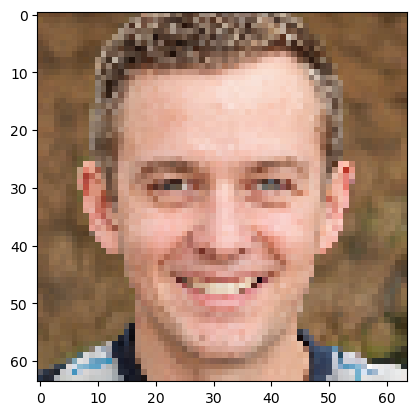

In [12]:
plt.imshow(test_generator[0][0][0])

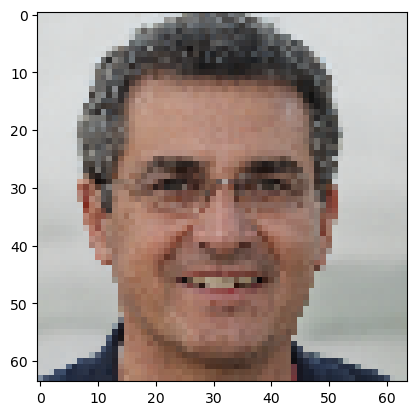

In [13]:
plt.imshow(test_generator[0][0][6])